In [ ]:
#featurelar çıkarılacak
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Example DataFrame
data = pd.read_excel('/content/renault.xlsx')

df = pd.DataFrame(data)

In [ ]:
df

,Fiyat,İlan No,Marka,Seri,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,...,BILGI YOK,TRAMER YOK,IYI_OZELLIK_NUMERIC,KOTU_OZELLIK_NUMERIC,TRAMER NUMERİK,BAKIM_DURUMU_BOOL,TRAMER YOK NUMERİK,BOYA SAYISI NUMERİC,DEGISEN SAYISI NUMERİC,YEDEK ANAHTAR BOOL
0,320000,25319621,Renault,Clio,1.2 Authentique,2004,272000,Düz,Benzin,Hatchback/5,...,[],['hasar kaydı yoktur'],0,0,0,1,1,0,0,0
1,645000,25319525,Renault,Clio,1.5 dCi Joy,2017,95000,Düz,Dizel,Hatchback/5,...,['renault clio 1 5 dci joy'],[],0,0,0,0,0,0,0,0
2,565000,25319405,Renault,Clio,1.5 dCi Touch,2015,208000,Düz,Dizel,Hatchback/5,...,[],[],1,0,0,0,0,0,0,0
3,289500,25319339,Renault,Clio,1.5 dCi Authentique,2003,290000,Düz,Dizel,Sedan,...,[],[],0,0,0,0,0,3,0,0
4,495000,25319317,Renault,Clio,0.9 TCe Icon,2013,126000,Düz,Benzin,Station wagon,...,[],[],4,0,14000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,565000,16480371,Renault,Clio,1.5 dCi SportTourer Joy,2016,193700,Düz,Dizel,Station wagon,...,[],[],1,0,0,0,0,2,0,1
4480,565000,14198384,Renault,Clio,1.5 dCi SportTourer Icon,2013,230000,Düz,Dizel,Station wagon,...,[],[],0,0,6400,0,0,5,1,0
4481,595000,12838693,Renault,Clio,1.5 dCi Touch,2015,171000,Düz,Dizel,Hatchback/5,...,[],[],0,0,0,0,0,0,0,0
4482,820000,11250701,Renault,Clio,1.0 TCe Joy,2022,25803,Otomatik,Benzin,Hatchback/5,...,[],[],0,0,0,0,0,0,0,0


Change the paint and its changing features that are not specified on the website with the help of the features from NER model

In [ ]:
def convert_value(value,a_value):
    if value == 'Yok':
        return 0
    elif value == 'Belirtilmemiş':
        return a_value
    elif value == 'Tamamı boyalı' or value == 'Tamamı değişen' :
        return 25
    else:
        match = re.search(r'\d+', value)
        if match:
            return int(match.group(0))
        else:
            return value

In [ ]:
df['Değişen'] = df.apply(lambda row: convert_value(row['Değişen'], row['DEGISEN SAYISI NUMERİC']), axis=1)
df['Boya'] = df.apply(lambda row: convert_value(row['Boya'], row['BOYA SAYISI NUMERİC']), axis=1)

In [ ]:
X = df.drop(columns=['İlan No','Marka','Seri','Boya-değişen', 'Kimden', 'Açıklama', 'Processed Açıklama Metni','DEGISEN', 'TRAMER', 'YEDEK ANAHTAR', 'BOYA',
       'BAKIM DURUMU', 'DEGISEN YOK', 'IYI OZELLIK', 'KOTU OZELLIK',
       'BILGI YOK','DEGISEN SAYISI NUMERİC','BOYA SAYISI NUMERİC',
       'TRAMER YOK NUMERİK','TRAMER YOK'])  # Features

In [ ]:
X

,Fiyat,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,...,Yakıt Deposu,Değişen,Boya,sentiment,sent-scores,IYI_OZELLIK_NUMERIC,KOTU_OZELLIK_NUMERIC,TRAMER NUMERİK,BAKIM_DURUMU_BOOL,YEDEK ANAHTAR BOOL
0,320000,1.2 Authentique,2004,272000,Düz,Benzin,Hatchback/5,Füme,1149,75,...,55,0,0,negative,0.647139,0,0,0,1,0
1,645000,1.5 dCi Joy,2017,95000,Düz,Dizel,Hatchback/5,Beyaz,1461,75,...,45,1,0,positive,0.529421,0,0,0,0,0
2,565000,1.5 dCi Touch,2015,208000,Düz,Dizel,Hatchback/5,Beyaz,1461,75,...,45,0,0,negative,0.812231,1,0,0,0,0
3,289500,1.5 dCi Authentique,2003,290000,Düz,Dizel,Sedan,Yeşil,1461,65,...,50,1,2,negative,0.982429,0,0,0,0,0
4,495000,0.9 TCe Icon,2013,126000,Düz,Benzin,Station wagon,Siyah,898,90,...,45,2,2,positive,0.579122,4,0,14000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,565000,1.5 dCi SportTourer Joy,2016,193700,Düz,Dizel,Station wagon,Beyaz,1461,75,...,45,1,3,positive,0.841054,1,0,0,0,1
4480,565000,1.5 dCi SportTourer Icon,2013,230000,Düz,Dizel,Station wagon,Beyaz,1461,90,...,45,1,5,positive,0.688087,0,0,6400,0,0
4481,595000,1.5 dCi Touch,2015,171000,Düz,Dizel,Hatchback/5,Beyaz,1461,75,...,45,0,2,negative,0.600600,0,0,0,0,0
4482,820000,1.0 TCe Joy,2022,25803,Otomatik,Benzin,Hatchback/5,Beyaz,999,100,...,42,0,0,positive,0.857705,0,0,0,0,0


In [ ]:

# Encode categorical features
label_encoders = {}
for column in ['Model', 'Vites Tipi', 'Yakıt Tipi', 'Kasa Tipi','Renk','sentiment','Çekiş']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le


# Normalize numerical features

scaler = StandardScaler()
X[['Fiyat','Km','Yıl','Motor Hacmi','Motor Gücü','Ort. Yakıt Tüketimi','Yakıt Deposu', 'Değişen','Boya','IYI_OZELLIK_NUMERIC','TRAMER NUMERİK','sent-scores', 'KOTU_OZELLIK_NUMERIC',
        'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL']] = scaler.fit_transform(X[['Fiyat','Km','Yıl','Motor Hacmi','Motor Gücü','Ort. Yakıt Tüketimi','Yakıt Deposu', 'Değişen','Boya','IYI_OZELLIK_NUMERIC','TRAMER NUMERİK','sent-scores', 'KOTU_OZELLIK_NUMERIC',
        'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL']] )


In [ ]:
X

,Fiyat,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,...,Yakıt Deposu,Değişen,Boya,sentiment,sent-scores,IYI_OZELLIK_NUMERIC,KOTU_OZELLIK_NUMERIC,TRAMER NUMERİK,BAKIM_DURUMU_BOOL,YEDEK ANAHTAR BOOL
0,-1.078807,11,-0.986968,1.144471,0,0,1,5,-0.081357,-0.070502,...,1.720787,-0.538068,-0.525727,0,-1.266878,-0.506031,-0.247012,-0.014986,2.120165,-0.342184
1,0.646655,69,0.783149,-0.780282,0,1,1,2,-0.081330,-0.070502,...,-0.647904,0.792708,-0.525727,1,-2.063959,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
2,0.221926,77,0.510823,0.448515,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,-0.525727,0,-0.149013,0.305501,-0.247012,-0.014986,-0.471661,-0.342184
3,-1.240735,53,-1.123131,1.340208,0,1,2,20,-0.081330,-0.072523,...,0.536442,0.792708,0.038775,0,1.003421,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4,-0.149712,0,0.238498,-0.443178,0,0,3,17,-0.081378,-0.067470,...,-0.647904,2.123483,0.038775,1,-1.727424,2.740095,-0.247012,-0.014798,-0.471661,-0.342184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,0.221926,73,0.646986,0.293012,0,1,3,2,-0.081330,-0.070502,...,-0.647904,0.792708,0.321026,1,0.046150,0.305501,-0.247012,-0.014986,-0.471661,2.922401
4480,0.221926,72,0.238498,0.687750,0,1,3,2,-0.081330,-0.067470,...,-0.647904,0.792708,0.885527,1,-0.989609,-0.506031,-0.247012,-0.014900,-0.471661,-0.342184
4481,0.381199,77,0.510823,0.046166,0,1,1,2,-0.081330,-0.070502,...,-0.647904,-0.538068,0.038775,0,-1.581996,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184
4482,1.575750,7,1.463963,-1.532751,1,0,1,2,-0.081370,-0.065448,...,-1.358511,-0.538068,-0.525727,1,0.158900,-0.506031,-0.247012,-0.014986,-0.471661,-0.342184


Build a function that clusters the data and evaluates the data

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

def clustering(model, data):
    label = model.fit_predict(data)
    cluster_labels = model.labels_

    cluster_centers = model.cluster_centers_

    print("Cluster labels:", cluster_labels)
    print("Cluster centers:", cluster_centers)

    silhouette = silhouette_score(data, label)
    davies_bouldin = davies_bouldin_score(data, label)

    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Score:", davies_bouldin)

    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    print("Her kümeye ait eleman sayısı:")
    for label, count in zip(unique_labels, counts):
        print(f"Küme {label}: {count} eleman")

    return label, model

Use Function

In [ ]:
model = KMeans(n_clusters=3)
data = X
all_data_modeled,all_data_model = clustering(model,data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [1 0 0 ... 0 1 2]
Cluster centers: [[ 3.13411674e-01  7.23033789e+01  3.46370645e-01  2.60965070e-02
   4.75916607e-01  1.07476636e+00  1.45363048e+00  4.82314881e+00
   5.66309998e-03 -9.87213265e-03  9.97124371e-01 -8.09906127e-01
  -3.03413099e-01  8.76167188e-02 -4.70569569e-02  4.96764917e-01
   1.40985335e-03  9.25539097e-02 -4.30568653e-02 -1.48494209e-02
   6.49639051e-02  9.85565692e-03]
 [ 6.79273756e-01  1.03534050e+01  7.39225470e-01 -8.24380762e-01
   3.38351254e-01  2.83154122e-01  1.08243728e+00  6.85806452e+00
  -7.40268865e-02  1.17797019e-02  9.97849462e-01  5.66093606e-02
  -5.04253870e-01 -2.03227469e-01 -2.63304208e-01  5.59139785e-01
   1.86676359e-02  1.54829270e-01 -7.15005864e-02  3.30348214e-02
  -7.59202957e-02  1.30536849e-01]
 [-8.14807143e-01  4.64528857e+01 -8.91060718e-01  6.55895714e-01
   1.23674912e-01  1.30565371e+00  1.52591284e+00  6.94346290e+00
   5.61779356e-02 -1.59042854e-03  9.97644287e-01  6.16966646e-01
   6.62827897e-01  9.

Use Function

In [ ]:
model = KMeans(n_clusters=3)
data = X.drop(columns=[
       'sent-scores', 'IYI_OZELLIK_NUMERIC', 'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL'])
all_data_modeled,all_data_model = clustering(model,data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [1 0 0 ... 0 1 2]
Cluster centers: [[ 3.13411674e-01  7.23033789e+01  3.46370645e-01  2.60965070e-02
   4.75916607e-01  1.07476636e+00  1.45363048e+00  4.82314881e+00
   5.66309998e-03 -9.87213265e-03  9.97124371e-01 -8.09906127e-01
  -3.03413099e-01  8.76167188e-02 -4.70569569e-02  4.96764917e-01
  -4.30568653e-02 -1.48494209e-02]
 [ 6.79273756e-01  1.03534050e+01  7.39225470e-01 -8.24380762e-01
   3.38351254e-01  2.83154122e-01  1.08243728e+00  6.85806452e+00
  -7.40268865e-02  1.17797019e-02  9.97849462e-01  5.66093606e-02
  -5.04253870e-01 -2.03227469e-01 -2.63304208e-01  5.59139785e-01
  -7.15005864e-02  3.30348214e-02]
 [-8.14807143e-01  4.64528857e+01 -8.91060718e-01  6.55895714e-01
   1.23674912e-01  1.30565371e+00  1.52591284e+00  6.94346290e+00
   5.61779356e-02 -1.59042854e-03  9.97644287e-01  6.16966646e-01
   6.62827897e-01  9.51869632e-02  2.54867843e-01  4.09305065e-01
   9.40137913e-02 -1.49752835e-02]]
Silhouette Score: 0.5982552653183133
Davies-Bouldin

Use Function

In [ ]:
model = KMeans(n_clusters=3)
data = X.drop(columns=['Model','sent-scores', 'KOTU_OZELLIK_NUMERIC',
        'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL'])
weights = [0.6,0.4,0.3,0.1,0.3,0.7,0.2,0.1,0.1,0.2,0.2, 0.3,
       0.1,0.2,-0.4,-0.5,0.1,0.4,-0.3]

all_data_modeled,all_data_model = clustering(model,data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [2 0 0 ... 0 0 2]
Cluster centers: [[ 3.43510712e-01  4.17417840e-01 -2.06949273e-01  3.84348687e-01
   8.02872709e-01  1.39623576e+00  2.08271421e+00  4.76199271e-03
   2.40699613e-03  9.97523526e-01 -3.90067416e-01 -4.08218743e-01
  -3.64728600e-02 -1.34294174e-01  5.26002972e-01  9.08608766e-02
  -1.49730293e-02]
 [ 1.32040529e-01  1.20229466e-03 -1.68310307e-01  3.75330396e-01
   8.29955947e-01  1.20704846e+00  1.32854626e+01  2.37774721e-02
   1.80370783e-02  9.95594714e-01  1.83638054e-01 -1.98165289e-01
  -4.91396925e-02  7.35899135e-02  4.74008811e-01  5.88237325e-02
  -1.49737108e-02]
 [-6.34145961e-01 -6.34685131e-01  4.57791565e-01  1.06766917e-01
   1.16090226e+00  1.45413534e+00  6.60300752e+00 -2.75202211e-02
  -1.90464730e-02  9.99248120e-01  4.35426256e-01  7.88805448e-01
   9.73024476e-02  1.41064199e-01  4.25563910e-01 -1.88130110e-01
   3.55080511e-02]]
Silhouette Score: 0.3438699635451917
Davies-Bouldin Score: 1.1027361563073932
Her kümeye ait eleman

Use Function

In [ ]:
model = KMeans(n_clusters=3)
data = X.drop(columns=['Model'])

all_data_modeled,all_data_model = clustering(model,data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [2 0 0 ... 0 0 2]
Cluster centers: [[ 3.43823842e-01  4.17577649e-01 -2.07707662e-01  3.84957942e-01
   8.02078179e-01  1.39584364e+00  2.08560119e+00  9.73719331e-03
   2.84394398e-03  9.97525977e-01 -3.89511103e-01 -4.07635510e-01
  -3.43353482e-02 -1.33424608e-01  5.26472044e-01 -6.82027145e-03
   9.22779346e-02 -6.81757137e-02 -1.49729956e-02 -1.63926746e-02
   5.19564695e-02]
 [ 1.33420484e-01  2.30645740e-03 -1.69732476e-01  3.76977153e-01
   8.28646749e-01  1.20826011e+00  1.32759227e+01  2.35003283e-02
   1.78081127e-02  9.95606327e-01  1.83256347e-01 -1.95812425e-01
  -5.04286064e-02  7.30020870e-02  4.75395431e-01  1.67910829e-02
   5.80477816e-02  9.11642419e-03 -1.49736410e-02 -2.75436558e-02
   7.79744949e-03]
 [-6.39019241e-01 -6.38905040e-01  4.62590749e-01  1.03396226e-01
   1.16452830e+00  1.45433962e+00  6.59849057e+00 -3.50356538e-02
  -1.96326363e-02  9.99245283e-01  4.36721673e-01  7.89936532e-01
   9.56826361e-02  1.40811138e-01  4.23396226e-01 -4.

Use Function

In [ ]:
model = KMeans(n_clusters=3)
data = X.drop(columns=['sent-scores', 'KOTU_OZELLIK_NUMERIC',
        'BAKIM_DURUMU_BOOL', 'YEDEK ANAHTAR BOOL','Çekiş'])

all_data_modeled,all_data_model = clustering(model,data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [0 1 1 ... 1 0 2]
Cluster centers: [[ 6.79273756e-01  1.03534050e+01  7.39225470e-01 -8.24380762e-01
   3.38351254e-01  2.83154122e-01  1.08243728e+00  6.85806452e+00
  -7.40268865e-02  1.17797019e-02  5.66093606e-02 -5.04253870e-01
  -2.03227469e-01 -2.63304208e-01  5.59139785e-01  1.54829270e-01
   3.30348214e-02]
 [ 3.13411674e-01  7.23033789e+01  3.46370645e-01  2.60965070e-02
   4.75916607e-01  1.07476636e+00  1.45363048e+00  4.82314881e+00
   5.66309998e-03 -9.87213265e-03 -8.09906127e-01 -3.03413099e-01
   8.76167188e-02 -4.70569569e-02  4.96764917e-01  9.25539097e-02
  -1.48494209e-02]
 [-8.14807143e-01  4.64528857e+01 -8.91060718e-01  6.55895714e-01
   1.23674912e-01  1.30565371e+00  1.52591284e+00  6.94346290e+00
   5.61779356e-02 -1.59042854e-03  6.16966646e-01  6.62827897e-01
   9.51869632e-02  2.54867843e-01  4.09305065e-01 -2.03020801e-01
  -1.49752835e-02]]
Silhouette Score: 0.598321660569551
Davies-Bouldin Score: 0.553886017778528
Her kümeye ait eleman s

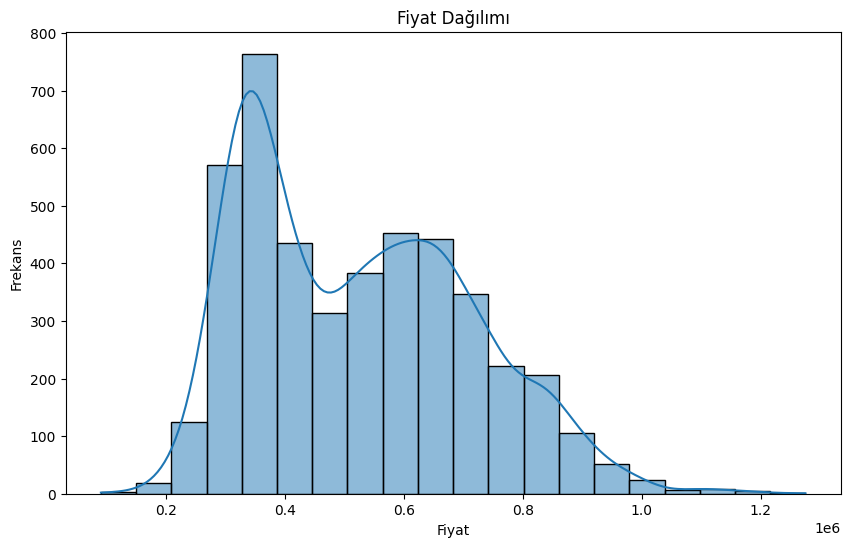

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(X['Fiyat'], kde=True, bins=20)
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

In [ ]:
import pickle

# Save model
with open('clustering_model.pkl', 'wb') as f:
    pickle.dump(all_data_model, f)

In [ ]:
#load model
with open('clustering_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
loaded_model

KMeans(n_clusters=5)

Try the model for other data

In [ ]:
c =X.iloc[:, :-1]

In [ ]:
son_15_veri_df = c.tail(15)

In [ ]:
tahminler = loaded_model.predict(son_15_veri_df)

In [ ]:
tahminler

array([4, 1, 4, 4, 1, 4, 0, 4, 0, 1, 2, 2, 2, 4, 4], dtype=int32)

In [ ]:
X.tail(15)

,Fiyat,Marka,Seri,Model,Yıl,Km,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Ort. Yakıt Tüketimi,Yakıt Deposu,Değişen,Boya,sentiment,IYI_OZELLIK_NUMERIC,TRAMER NUMERİK,Cluster
10209,-0.062647,42,214,725,-1.330287,0.031462,0,4,3,2,0.338490,-0.860717,0.989513,-0.935000,-0.536119,-0.561238,1,-0.470165,-0.023756,4
10210,-0.047221,41,117,1069,-1.206682,-0.013626,0,4,8,7,0.338490,0.109597,1.061847,-0.286595,0.658580,-0.030375,1,-0.470165,-0.023756,1
10211,-0.033211,32,266,708,0.771014,-0.037674,0,1,8,18,-0.156749,-0.444868,-1.180492,-0.286595,0.658580,0.235056,0,-0.470165,0.008386,4
10212,0.130714,42,75,652,0.894620,-0.081760,2,0,3,2,-0.022999,1.218527,0.338512,1.788302,-0.536119,-0.561238,1,0.109896,-0.023756,4
10213,-0.005890,42,149,1047,0.400196,0.021442,2,1,3,18,0.338490,-0.029019,-1.180492,-0.286595,-0.536119,-0.561238,0,0.689957,-0.023756,1
10214,-0.018499,32,142,708,0.771014,-0.023646,2,1,8,18,-0.156749,0.109597,-0.818825,1.010216,-0.536119,-0.561238,1,-0.470165,-0.023756,4
10215,-0.083649,32,224,292,-2.442741,0.086570,0,4,8,2,-0.413407,-0.638931,-0.818825,-0.675638,-0.536119,-0.561238,0,-0.470165,-0.023756,0
10216,-0.020601,6,89,902,1.018226,-0.111819,0,1,8,2,0.201124,-0.361699,-0.891158,-0.545957,-0.536119,-0.561238,0,-0.470165,-0.023756,4
10217,-0.073141,14,141,181,-1.453893,-0.026652,0,4,3,13,-0.948410,-0.860717,1.134180,-1.324043,-0.536119,-0.561238,0,-0.470165,-0.023756,0
10218,0.043147,42,210,1045,0.647408,-0.071741,2,1,8,6,0.338490,0.386830,-1.108159,1.788302,0.658580,-0.561238,0,-0.470165,-0.023756,1
